# Examen Scripting

## Import Statements

During the whole project I have used alot of libraries for multiple reasons:
 <ul>
    <li><b>Pandas:</b> Dataframes </li>
    <li><b>Numpy:</b>  Unique ID's in lists</li>
    <li><b>Requests:</b> To retrieve all API information from TMDB, OMDB</li>
    <li><b>JSON:</b> Used to format requests into JSON format </li>
    <li><b>Matplotlib:</b> To create all plots for the visualization</li>
    <li><b>Re:</b> Used in the Movie credits to extract the Oscars, Wins & Nominations from 1 sentence </li>
    <li><b>PyImgur:</b> Used for the Dashboard, using the API from Imgur it will upload automatically a generated image from on of my plots, so the information in my Dashboard is accurate. </li>
    <li><b>Os:</b> Used to get the current working directory </li>
    <li><b>Wordcloud:</b> From the movies of the Directors create a cloud of words </li>
    <li><b>Collections:</b> To create a Counter of all the Unique words in a list</li>
    <li><b>Matplotlib_venn:</b> To create a venn diagram of from the most popular & best movies</li>
    <li><b>Bokeh:</b> Collection of all the imports from Bokeh that I have implemented</li>
    <li><b>Fpdf:</b> Used to paste all plots into a PDF file. </li>
    <li><b>Glob:</b> Module to find all the files matching a pattern</li>
    <li><b>Math:</b> Used to for creating labels for each of my plots. </li>

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import re
import pyimgur
import os
import math
import glob
 

from wordcloud import WordCloud, STOPWORDS 
from PIL import Image
from io import BytesIO
from collections import Counter
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
from bokeh.io import show, output_file, curdoc, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, FactorRange, LinearColorMapper, ColorBar, CustomJS, Slider, LabelSet, Grid, HBar, LinearAxis, Plot
from bokeh.layouts import row, column, gridplot
from bokeh.transform import dodge
from bokeh.tile_providers import CARTODBPOSITRON, get_provider
from bokeh.io import output_notebook, show,  output_file
from bokeh.models.widgets import Div
from fpdf import FPDF

%matplotlib inline

## Data Collection


### The Movie Database
My first step in making a collection of data was to find the right resources to work with, to retrieve the most information possible. After some research I decided to work with <b>The Movie Database (TMDB) and Open Movie Database (OMDB)</b>. I created on each website a account and gathered all information needed to start extracting information. My APIs:
<ul>
    <li><b>TMDB API:</b> 3e3d782b81bd568a64a472347fdd0a59</li>
    <li><b>OMDB API:</b> 3c0abaf3</li>

### Collection of all lists
Because I have extracted a lot of information about each possible request on both sites I have made a lot of lists that I used in the rest of the exercices

In [2]:
pages = ["1","2","3","4","5"]
title = list()
popularity = list()
genre = list()
genre_id = list()
release_date = list()
score = list()
movie_id = list()
revenue = list()
runtime = list()
budget = list()
profit = list()
revenue = list()
runtime = list()
budget = list()
return_on_investement = list()
genreName = list()
temp_genreName = list()
actors = list()
temp_actors = list()
imdb_id = list()
profit = list()
allpages = list()
allmoviesinRomance = list()
Total_Nominations = list()
Oscars = list()
Wins = list()
Nominations = list()
Posters = list()
Directors = list()
Countries_Romance = list()
Movies_from_Directors = list()
temp_movies_from_director = list()
Rated = list()
Directors_25 = list()
Movie1 = list()
Movie2 = list()
Movie3 = list()
All_actors = list()
Director = list()
Directors_ID = list()
bestMovieScore = list()
bestMovieName = list()
yearTimeframe = list()
total_movies = list()
actorcount = list()
numbercount = list()
ratenames = list()
ratecount = list()
word_total = list()
count_total = list()    

### Collects the Top movies in Romance (Top 100)
Using the API Requests I could sort the movies on <b>"Popularity" or "Vote Count"</b> & Choose the <b>"Romance"</b> genre using the specific id: 10749
<br>
Information retrieved:
<ul>
    <li>Popular Movie Titles</li>
    <li>Popularity Score</li>
    <li>Release Date</li>
    <li>Vote Average</li>
    <li>Genre IDs</li>
    <li>Movie IDs</li>
    <li>Best Movie Titles</li>
    <li>Best Movie Vote Count</li>
</ul>

In [3]:
# Collects info about the TOP movies in the Genre Romance based on Popularity
for i in pages:
    r1 = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=3e3d782b81bd568a64a472347fdd0a59&language=en-US&sort_by=popularity.desc&include_adult=true&include_video=false&page=' + i + '&primary_release_date.gte=1990-01-01&primary_release_date.lte=1999-12-31&with_genres=10749').json()
    for y in r1['results']:
        title.append(y['title'])
        popularity.append(y['popularity'])
        release_date.append(y['release_date'])
        score.append(y['vote_average'])
        genre_id.append(y['genre_ids'])
        movie_id.append(y['id'])
             
movie_id = list(map(str, movie_id))
print("Top Movies in Romance Collected")

# Collects info about the TOP movies in the Genre Romance based on vote_count
bestMoviesRequest = requests.get("https://api.themoviedb.org/3/discover/movie?api_key=3e3d782b81bd568a64a472347fdd0a59&sort_by=vote_count.desc&include_video=false&page=all&primary_release_date.gte=1990-01-01&primary_release_date.lte=1999-12-31&with_genres=10749").json()
for y in bestMoviesRequest['results']:
    bestMovieName.append(y['title'])
    bestMovieScore.append(y['vote_count'])

Top Movies in Romance Collected


### Collects more details about each movie
Now that I have retrieved the ID about each popular movie, I can collect more personal information about each movie using another <b>Movie</b> API request. 
<br>
Information Retrieved:
<ul>
    <li>Movie revenue</li>
    <li>Movie runtime</li>
    <li>Movie budget</li>
    <li>Movie imdb_id</li>
    <li>Movie Return on Investement</li>
    <li>Movie Genre Names</li>
</ul>

In [4]:
for id in movie_id:
    movie_info = requests.get('https://api.themoviedb.org/3/movie/' + id + '?api_key=3e3d782b81bd568a64a472347fdd0a59&language=en-US').json()
    revenue.append(movie_info['revenue'])
    runtime.append(movie_info['runtime'])
    budget.append(movie_info['budget'])
    imdb_id.append(movie_info['imdb_id'])
    try:
        return_on_investement.append((movie_info['revenue'] - movie_info['budget'])/movie_info['budget'] * 100)
    except ZeroDivisionError:
        return_on_investement.append(0)
    profit.append((movie_info['revenue'] - movie_info['budget']))
        
    for i in movie_info['genres']:
        temp_genreName.append(i['name'])
    genreName.append(temp_genreName)
    temp_genreName = []
print("Details about Movies Collected")


Details about Movies Collected


### Collect all the movies id in Romance
For some of the "Data Insight" questions I needed to retrieve all the Movies ID in Romance between the timeframe of 1990-2000. The following requests takes a long time, because it has to perfrom more than 2500 requests! During this phase each page (144pages) will retrieve all the Movie ID of all the movies in Romance during 1990-2000.

Information retrieved:
<ul>
    <li>All Movie IDs</li>
<ul>

In [5]:
total_pages = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=3e3d782b81bd568a64a472347fdd0a59&language=en-US&sort_by=popularity.desc&include_adult=true&include_video=false&page=1&primary_release_date.gte=1990-01-01&primary_release_date.lte=1999-12-31&with_genres=10749').json()
for y in range(1, total_pages['total_pages'] + 1):
    allpages.append(str(y))

for page in allpages:
    Collect_Movie_ID = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=3e3d782b81bd568a64a472347fdd0a59&language=en-US&sort_by=popularity.desc&include_adult=true&include_video=false&page=' + page + '&primary_release_date.gte=1990-01-01&primary_release_date.lte=1999-12-31&with_genres=10749').json()
    for i in Collect_Movie_ID['results']:
        allmoviesinRomance.append(i['id'])

allmoviesinRomance = list(map(str, allmoviesinRomance))

print("All id of all the romance movies collected")

All id of all the romance movies collected


### Collects the country of each movie in romance
With the all the movie IDs gathered, I retrieved the production countries from each movie. This gave me a list of all the countries who made Romance Movies during 1990-2000.

Information Retrieved:
<ul>
    <li> Countries of production company </li>
<ul>

In [6]:
for id in allmoviesinRomance:
    Collect_Country = requests.get('https://api.themoviedb.org/3/movie/'+ id +'?api_key=3e3d782b81bd568a64a472347fdd0a59').json()
    try:
        for i in Collect_Country['production_countries']:
            Countries_Romance.append(i['name'])
    except KeyError:
        break
        
Country_Counter = Counter(Countries_Romance).most_common() 

### Collects all the credits information about each movie
I have made a second requests call to gather cast & crew information about each movie. I decided to put them into a seperate cell so that I don't need to wait for information above to be retrieved. 

Information retrieved:
<ul>
    <li>Director Name</li>
    <li>Director ID</li>
    <li>Cast/Actors Name</li>
</ul>

In [7]:
#Gives the Credits of each movie
for id in movie_id:
    credits_info = requests.get('https://api.themoviedb.org/3/movie/' + id + '/credits?api_key=3e3d782b81bd568a64a472347fdd0a59').json()
    for i in credits_info['crew']:
        if(i['job'] == "Director"):
            Director.append(i['name'])
            Directors_ID.append(i['credit_id'])
for id in allmoviesinRomance:
    credits_info = requests.get('https://api.themoviedb.org/3/movie/' + id + '/credits?api_key=3e3d782b81bd568a64a472347fdd0a59').json()
    try:
        for i in credits_info['cast']:
            All_actors.append(i['name'])
    except KeyError:
        break
        
print("Credits/Actors name collected")

Credits/Actors name collected


### Collects the top movies each director in Romance has done
With the retrieved Director IDs in the previous cell I could find specific information about each director of all the romance movies. I used it in question 9 to retrieve the Top3 movies from each director.

Information retrieved:
<ul>
    <li>Top 3 Movies from each Director</li>

In [8]:
Movie = list()
for id in Directors_ID:
    Director_movies = requests.get('https://api.themoviedb.org/3/credit/' + id +'?api_key=3e3d782b81bd568a64a472347fdd0a59').json()
    if id == "52fe4219c3a36847f800403b":
        break
    for i in range(3):
        #print(Director_movies['person']['known_for'][i]['title'])
        try:
            string1 = str(Director_movies['person']['known_for'][i]['title'])
            temp_movies_from_director.append(string1)
        except (KeyError, IndexError) as e:
            temp_movies_from_director.append("")
    Movies_from_Directors.append(temp_movies_from_director)
    temp_movies_from_director = []
    
print("Director Movies collected")

Director Movies collected


### Collects extra data about movies on OMDB API.
With the use of the IMDB_ID that we can retrieve in TMDB, I can find some more information about each movie using the OMDB API. Here I retrieved the Oscars, Wins & Nominations. I also retrieved the rating of the movies.

Information retrieved:
<ul>
    <li>Movie Ratings</li>
    <li>Oscars</li>
    <li>Nominations</li>
    <li>Wins</li>

In [9]:
for id in imdb_id:
    OMDB = requests.get('http://www.omdbapi.com/?i=' + id + '&apikey=3c0abaf3').json()
    s = OMDB['Awards']
    Rated.append(OMDB['Rated'])
    filtered_oscars = re.findall(r"(\d+) Oscar", s) or ["0"]
    filtered_wins = re.findall(r"(\d+) win", s) or ["0"]
    filtered_nominations = re.findall(r"(\d+) nomination", s) or ["0"]
    Oscars.append(filtered_oscars)
    Wins.append(filtered_wins)
    Nominations.append(filtered_nominations)
    
print("OMDB Data collected")

OMDB Data collected


## Data Insights

No that I have retrieved all my information needed to start answering all the Data Insights questions, I started to create Dataframes for each question to have a visual representation of my retrieved data.

#### Questions

##### 1. Which are the most popular movies in your genre?


To find the most popular movies in Romance I have filtered my TMDB request to have all the movies with the highest popularity ranking. TMDB calculates the popularity based on the number of votes, views, marked as "favorite", marked as "watch later", total votes. (https://developers.themoviedb.org/3/getting-started/popularity).

In [10]:
mostPopular =  {'Title':title,
                'Popularity': popularity}

# Created the Dataframe with the Title & Popularity-
df_popular = pd.DataFrame(mostPopular, columns = pd.Index(['Title', 'Popularity'], name= 'Rank'))


#Changed the index to start at 1 and not 0
df_popular.index += 1

#To avoid any excessive data i have filtered out only the top 10
print(df_popular.head(10))

Rank                        Title  Popularity
1                         Titanic      32.354
2                    Forrest Gump      37.582
3                        The Mask      31.411
4                         Aladdin      33.055
5                         Gattaca      27.211
6            Beauty and the Beast      23.189
7                        Hercules      23.078
8     Dilwale Dulhania Le Jayenge      23.284
9      10 Things I Hate About You      25.010
10            Edward Scissorhands      25.894


##### 2. Which are the best movies in your genre ?

To find the best movies in Romance I first decided to pick out the "Vote_average" from each movie. The problem was that all the collected movies had a 10/10 which is not very a effective way to find out the best movie. So I decided to pick the <b>"Vote_count"</b> instead which is more representative. The "vote_count" gives you a good representation if people liked the movie or not. The popularity ranking only gives out if people are interested in the movies but maybe they don't really appreciate the movie.

In [11]:
bestMovie =  {'Title':bestMovieName,
                'Vote count': bestMovieScore}

# Created the Dataframe with the Title & Vote count
df_bestmovie = pd.DataFrame(bestMovie)

#Changed the index to start at 1 and not 0
df_bestmovie.index += 1

#Show first 10 results
print(df_bestmovie.head(10))

                         Title  Vote count
1                 Forrest Gump       18162
2                      Titanic       17089
3          Edward Scissorhands        8877
4                      Aladdin        7946
5         Beauty and the Beast        6888
6                     The Mask        6634
7                 American Pie        5222
8   10 Things I Hate About You        5000
9                Groundhog Day        4871
10                    Hercules        4832


##### 3. Are these the same?

To compare both results from previous exercice I put them both in 1 dataframe with their Title. To see if the are the same, I looped through each line to check if the name matches.

In [12]:

movie_popular_best =  {'Most Popular':title[:10],
                       'Best Movies': bestMovieName[:10]}
df_movie_popular_best = pd.DataFrame(movie_popular_best)

#Index start at 1
df_movie_popular_best.index += 1

#Show first 10 results
print(df_movie_popular_best)

# Check if movies in both ranking match.
print("")
for i in range(0,10):
    if title[i] == bestMovieName[i]:
        print("The movie " + title[i] + " has the same ranking" )  
    if title[i] != bestMovieName[i]:
        print("The movie " + title[i] + " is not the same as " + bestMovieName[i] )
    

                   Most Popular                 Best Movies
1                       Titanic                Forrest Gump
2                  Forrest Gump                     Titanic
3                      The Mask         Edward Scissorhands
4                       Aladdin                     Aladdin
5                       Gattaca        Beauty and the Beast
6          Beauty and the Beast                    The Mask
7                      Hercules                American Pie
8   Dilwale Dulhania Le Jayenge  10 Things I Hate About You
9    10 Things I Hate About You               Groundhog Day
10          Edward Scissorhands                    Hercules

The movie Titanic is not the same as Forrest Gump
The movie Forrest Gump is not the same as Titanic
The movie The Mask is not the same as Edward Scissorhands
The movie Aladdin has the same ranking
The movie Gattaca is not the same as Beauty and the Beast
The movie Beauty and the Beast is not the same as The Mask
The movie Hercules is not

##### 4. During your timeframe, when was your genre the most & least popular?

To find out the popularity of Romance movies during my timeframe I decided to loop though the each year and collect the <b>"Total Results"</b> from the JSON request which gives me all the count of all the movies during that period.

In [13]:
Years = ["1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000"]
for year in Years:
    MostPopularInTimeFrame = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=3e3d782b81bd568a64a472347fdd0a59&language=en-US&sort_by=popularity.desc&include_adult=true&include_video=false&page=1&primary_release_date.gte=' + year + '-01-01&primary_release_date.lte=' + year + '-12-31&with_genres=10749').json()
    yearTimeframe.append(year)
    total_movies.append(MostPopularInTimeFrame['total_results'])

AmountOfMoviesPerYear =    {'Year':yearTimeframe,
                            'Total Movies': total_movies}


# Created the Dataframe with the Years & Movie count/year
df_AmountOfMoviesPerYear = pd.DataFrame(AmountOfMoviesPerYear)

#Index start at 1
df_AmountOfMoviesPerYear.index += 1

#Print dataframe
print(df_AmountOfMoviesPerYear)


# Print the Most & Least Popular year during my Timeframe.
print(" ")
print("The genre was the most popular in the year " + df_AmountOfMoviesPerYear.Year.max())
print("The genre was the least popular in the year " + df_AmountOfMoviesPerYear.Year.min())

    Year  Total Movies
1   1990           198
2   1991           223
3   1992           254
4   1993           266
5   1994           238
6   1995           297
7   1996           288
8   1997           369
9   1998           363
10  1999           390
11  2000           429
 
The genre was the most popular in the year 2000
The genre was the least popular in the year 1990


##### 5. Are the movies who invested the highest budget, also the movies who turned over the highest proﬁt?

For this exercices I collected 2 types of informations, <b>"Revenue" & "Budget"</b>. I manipulated this data to find out the profit <b>(Budget - Revenue)</b>. I also decided to print out the "Return of Investement" <b>((Revenue - Budget)/Budget * 100)</b> which gives a clear view of how much % profit they made compared to their budget.

In [14]:
data_revenue = {'Title':title[:10],
                'Revenue': revenue[:10],
                'Budget': budget[:10],
                'Profit': profit[:10],
                'ROI': return_on_investement[:10]
                }



df = pd.DataFrame(data_revenue)
df = df.sort_values(by ='Budget', ascending=False)
df = df.round()
df.index += 1
print(df)

                          Title     Revenue     Budget      Profit     ROI
1                       Titanic  1845034188  200000000  1645034188   823.0
7                      Hercules   252712101   85000000   167712101   197.0
2                  Forrest Gump   677387716   55000000   622387716  1132.0
5                       Gattaca    12532777   36000000   -23467223   -65.0
4                       Aladdin   504050219   28000000   476050219  1700.0
6          Beauty and the Beast   377350553   25000000   352350553  1409.0
3                      The Mask   351583407   23000000   328583407  1429.0
10          Edward Scissorhands    53000000   20000000    33000000   165.0
9    10 Things I Hate About You    53478166   16000000    37478166   234.0
8   Dilwale Dulhania Le Jayenge   100000000   13200000    86800000   658.0


##### 6. Which actor plays in the most "Romance" Movies?

With the credits information of each movie I can retrieve all the <b>actors</b> that play in each movie. I wanted to make a count of all the actors that play in Romance movies, to see which actor prefers Romance movies. With the retrieved information we can see that Indian Actors are the most likely to perform Romance movies

In [15]:
#With the use of a Counter it counts the amount of same values in a list.
allactors = Counter(All_actors).most_common()

#Only take the top 10 actors in the list
for i in range(10):
    actorcount.append(allactors[i][0])
    numbercount.append(allactors[i][1])

#Insert Dataframe information
actors = {'Name': actorcount,
          'Count': numbercount
                }
#Create Dataframe
df_actors = pd.DataFrame(actors)

#Start index at 1 and not 0
df.index += 1

print(df_actors)

              Name  Count
0      Anupam Kher     26
1       Manivannan     23
2    Shakti Kapoor     22
3       Kader Khan     21
4           Nassar     21
5     Johnny Lever     20
6  Manisha Koirala     20
7        Janagaraj     20
8            Ramki     20
9     Brahmanandam     20


##### 7.How many Oscars, Wins & Nominations did the best Romance movies get?

For this exercice I first collected all the <b>IMDB_ID's</b> from my TOP 10 romance movies. With the use of the OMDB API we could retrieve the <b>"Awards"</b> which gives out a string with all the Oscars, Wins & Nominations of the movie. With the use of REGEX I split up each digit before a certain word ("Oscars, "Wins", "Nominations"). So I created a list for each. I then put everything in a dataframe.

In [16]:
#Inserted dataframe information
data_Oscars = { 'Title': title,
                'Oscars': Oscars,
                'Wins': Wins,
                'Nominations': Nominations
               }

#Display all the collected input.
pd.set_option("display.max_rows", None, "display.max_columns", None)

#Create the dataframe.
df_Oscars = pd.DataFrame(data_Oscars)

#I had to filter out the ['0'] to get 0 using str.get(0)
df_Oscars['Oscars'] = df_Oscars['Oscars'].str.get(0)
df_Oscars['Wins'] = df_Oscars['Wins'].str.get(0)
df_Oscars['Nominations'] = df_Oscars['Nominations'].str.get(0)

print(df_Oscars)

                            Title Oscars Wins Nominations
0                         Titanic     11  114          83
1                    Forrest Gump      6   44          74
2                        The Mask      1    6          20
3                         Aladdin      2   31          22
4                         Gattaca      1    6          15
5            Beauty and the Beast      2   26          33
6                        Hercules      1    9          15
7     Dilwale Dulhania Le Jayenge      0   15           3
8      10 Things I Hate About You      0    2          13
9             Edward Scissorhands      1    9          23
10                   American Pie      0    9          14
11                          Crash      0    9           6
12    What's Eating Gilbert Grape      1    8           6
13                  Groundhog Day      0    6          17
14                     Pocahontas      2   13           7
15                       Clueless      0    6          11
16            

##### 8. What are the most "Parental Guidance" PG movies in Romance?

For this exercice I collected all the "Ratings" from all the best romance movies. To see if most of the romance movies have a strict Parental Guideline. For the request I took the <b>"Rated"</b> and put a Counter to find the occurences of the value.

In [17]:
#Counter of all the actors
allrates = Counter(Rated).most_common()
#print(allrates)
amount_of_output = len(allrates)
ratenames = []
ratecount = []
#for loop trough all the rates (Only found 8)
for i in range(amount_of_output):
    ratenames.append(allrates[i][0])
    ratecount.append(allrates[i][1])

# Insert dataframe information
rates = {'Rate': ratenames,
          'Count': ratecount
                }

                    
df_rates = pd.DataFrame(rates)
df_rates.index += 1
print(df_rates)

        Rate  Count
1          R     39
2      PG-13     38
3         PG     13
4          G      7
5  Not Rated      1
6      NC-17      1
7    Unrated      1


##### 9. Which movies did each director in the Top 10 of Romance movie do?

First of all with the <b>"Credits"</b> information page of each movie I could retrieve the <b>"Director" & the "Director ID"</b>. TMDB offers also a <b>"Credit"</b> page which gives out more personal inforamation about any Director/Actor... I used the Director ID to get his information. On each Director page I collected the 3 <b>"Titles"</b> of Movies he has made.  Each of them I saved in 3 lists and displayed them in a Dataframe.

In [34]:
# Takes from each Director the 3 most popular titles.
for i in range(10):
    Movie1.append(Movies_from_Directors[i][0])
    Movie2.append(Movies_from_Directors[i][1])
    Movie3.append(Movies_from_Directors[i][2])
    Directors_25.append(Director[i])

    
# Insert Dataframe information
data_director = { 'Director': Directors_25,
                'Movies 1': Movie1,
                'Movie 2': Movie2,
                'Movie 3': Movie3
               }

# Puts all the columns on 1 line.
pd.set_option('expand_frame_repr', False)

# Created dataframe
df_director = pd.DataFrame(data_director)
df_director.index += 1
print(df_director)


           Director              Movies 1                      Movie 2                     Movie 3
1     James Cameron                Avatar                      Titanic              The Terminator
2   Robert Zemeckis          Forrest Gump           Back to the Future  Back to the Future Part II
3     Chuck Russell              The Mask            The Scorpion King                      Eraser
4      Ron Clements                 Moana                      Aladdin          The Little Mermaid
5       John Musker                 Moana                      Aladdin          The Little Mermaid
6     Andrew Niccol       The Truman Show                      In Time                The Terminal
7    Gary Trousdale  Beauty and the Beast  The Hunchback of Notre Dame   Atlantis: The Lost Empire
8         Kirk Wise  Beauty and the Beast  The Hunchback of Notre Dame   Atlantis: The Lost Empire
9      Ron Clements                 Moana                      Aladdin          The Little Mermaid
10      Jo

##### 10.Which Country did the most Romance Movies during 1990-2000?

To find out the Countries who made the most Romance movies during 1990-2000 I have retrieved all the <b>"Movie ID's"</b> and collected each the <b>"Production_Countries"</b> name in a list. Using the Counter I counted all the Unique values. The values were put in 2 different list that I displayed in a Dataframe.

In [19]:
# Filter out the Counter information in 2 lists
for i in range(10):
    word_total.append(Country_Counter[i][0])
    count_total.append(Country_Counter[i][1])

#Insert Dataframe information
data_countries = { 'Country': word_total,
                   'Count': count_total}

# Display all values from the datagframe
pd.set_option('expand_frame_repr', False)

# Created the dataframe
df_countries = pd.DataFrame(data_countries)
print(df_countries)   

                    Country  Count
0  United States of America    847
1                    France    257
2                     India    243
3            United Kingdom    213
4                 Hong Kong    139
5                     Japan    132
6                   Germany    122
7               Philippines     86
8                    Canada     83
9                     Italy     82


## Data Visualization

##### Function for labeling all the bar charts
For the visualisation, I have chosen to use <b>Matplotlib</b>. Before creating any plots I have taken a code online, which will add labels to each of the columns.

In [20]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

##### 1. Which are the most popular movies in your genre?

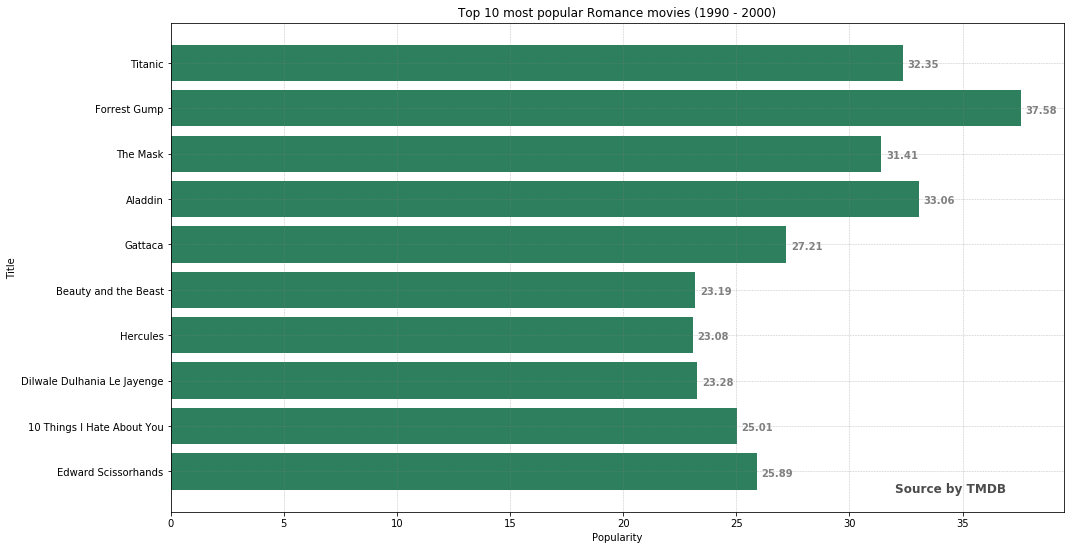

In [21]:
#Sizing the bar plot
fig, ax = plt.subplots(figsize =(16,9))

# Creating Horizontal Barplot
ax.barh(title[:10], popularity[:10], color = '#2d7f5e')

#Add gridlines
ax.grid(b = True, color='grey', linestyle= '--', linewidth= 0.5, alpha = 0.5)

#Show top values first
ax.invert_yaxis()

#Plot Title
ax.set_title('Top 10 most popular Romance movies (1990 - 2000)')

#Add numbers to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2,i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight = 'bold', color = 'grey')

#Add own watermark
fig.text(0.85, 0.15, 'Source by TMDB', fontsize=12, color='black',fontweight='bold', ha='right', va='bottom', alpha=0.7)


#Creating bar plot
plt.xlabel('Popularity')
plt.ylabel('Title')
#Saving file as .png for PDF file later.
plt.savefig('1. Popularity.png')
plt.show()

##### 2. Which are the best movies in your genre ?

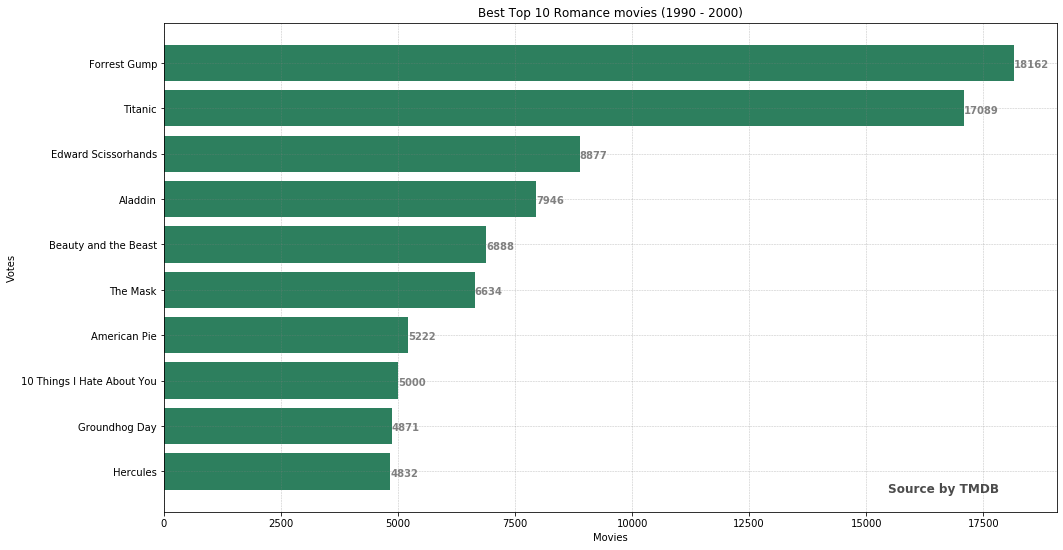

In [22]:
#Sizing the bar plot
fig, ax = plt.subplots(figsize =(16,9))

# Creating Barplot
ax.barh(df_bestmovie['Title'].values[:10], df_bestmovie['Vote count'].values.astype(int)[:10], color = '#2d7f5e')

#Add gridlines
ax.grid(b = True, color='grey', linestyle= '--', linewidth= 0.5, alpha = 0.5)

#Show top values first
ax.invert_yaxis()

#Plot Title
ax.set_title('Best Top 10 Romance movies (1990 - 2000)')

#Add numbers to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2,i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight = 'bold', color = 'grey')


#Add own watermark
fig.text(0.85, 0.15, 'Source by TMDB', fontsize=12, color='black',fontweight='bold', ha='right', va='bottom', alpha=0.7)

plt.xlabel('Movies')
plt.ylabel('Votes')

#Saving file as .png for PDF file later.
plt.savefig('2. Best.png')
plt.show()

##### 3. Are these the same?
At the time of writing we can see that the <b>Popular movies</b> and the <b>best movies</b> have 7 movies in common. I have used a venn diagram where I compare the name of the movies with each other, if they matched they are put in the same pool. I also upload the venn-diagram directly to Imgur so that later on the updated venn diagram is used in the Dashboard.

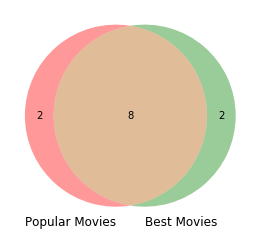

<Figure size 432x288 with 0 Axes>

In [23]:
venn2([set(title[:10]), set(bestMovieName[:10])],set_labels = ('Popular Movies', 'Best Movies'))

#Creation of Venn Diagram
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('3. venn.png', dpi=100)

#Upload to IMGUR with API
CLIENT_ID = "9ef0f6bbc1b0d7c"
DIR = os.getcwd()
PATH = DIR + '\\3. venn.png'

im = pyimgur.Imgur(CLIENT_ID)
uploaded_image = im.upload_image(PATH, title="venn-diagram")
venn_imgur = uploaded_image.link

##### 4. During your timeframe, when was your genre the most & least popular?
For this questions I used a <b>Area Chart</b> which gives a good overview of all the movies made each year. We can see that Romance was getting popular at the end of the 20th century.

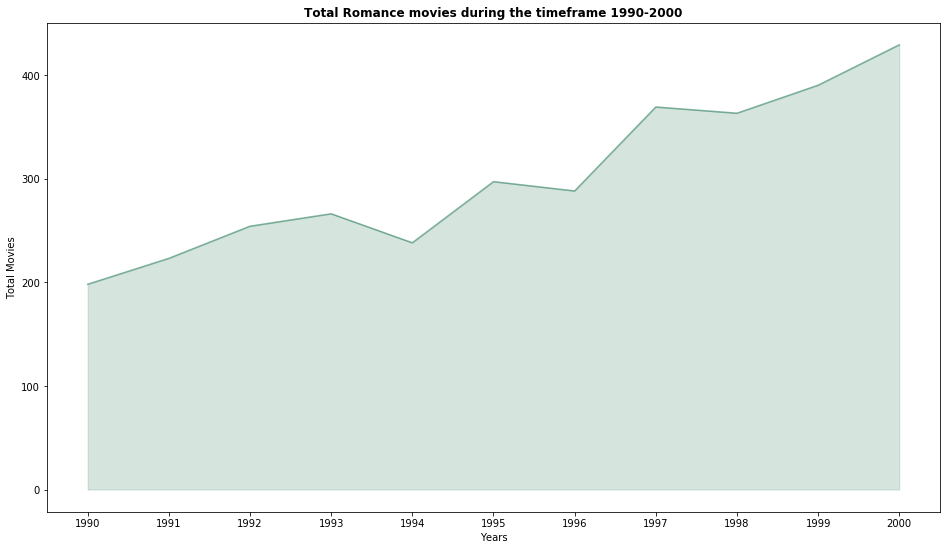

In [24]:
#Sizing the bar plot
ax = plt.subplots(figsize = (16, 9))

#Fills the chart with light green color until plot line
plt.fill_between( yearTimeframe, total_movies, color="#2d7f5e", alpha=0.2)

#Label names
plt.xlabel('Years')
plt.ylabel('Total Movies')
plt.title('Total Romance movies during the timeframe 1990-2000', fontweight='bold')

#Trend line
plt.plot(yearTimeframe, total_movies, color="#2d7f5e", alpha=0.6)

# See the line plot function to learn how to customize the plt.plot function
plt.savefig('4. Timeframe.png')

##### 5. Are the movies who invested the highest budget, also the movies who turned over the highest proﬁt?
For question 5 I have to compare for each movie how the Budget, Revenue and Profit compare to each other. I decided to create a triple barchart for each movie where each value has a different color.

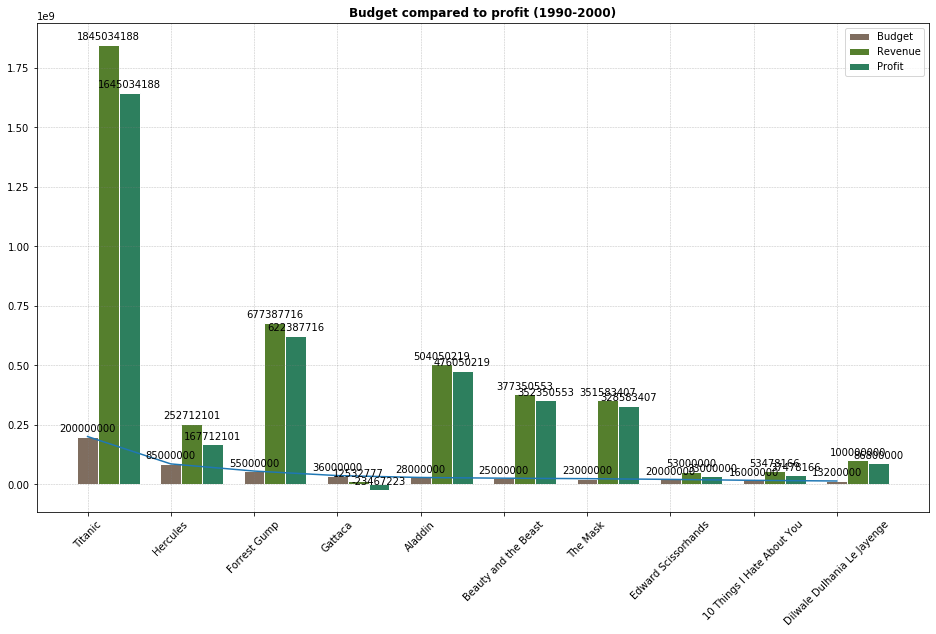

In [25]:
# Represents the width of each bar
barWidth = 0.25

# Will place the 3 bar charts next to each other, with the respective width.
r1 = np.arange(len(df['Budget'].values.astype(int)))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

#Sizing the bar plot
fig, ax = plt.subplots(figsize =(16,9))
ax = plt.subplot(111)
ax.set_title('Budget compared to profit (1990-2000)', fontweight='bold')

#Add gridlines
ax.grid(b = True, color='grey', linestyle= '--', linewidth= 0.5, alpha = 0.5)

# Insert data from the Dataframe into the bar charts.
rect1= ax.bar(r1, df['Budget'].values.astype(int), color = '#7f6d5f', width=barWidth,edgecolor='white', label='Budget')
rect2= ax.bar(r2, df['Revenue'].values.astype(int), color = '#557f2d', width=barWidth,edgecolor='white', label='Revenue')
rect3= ax.bar(r3, df['Profit'].values.astype(int), color = '#2d7f5e', width=barWidth,edgecolor='white',  label='Profit')

#Labeling each bar.
autolabel(rect1)
autolabel(rect2)
autolabel(rect3)

# Give names to labels
plt.plot(df['Title'].values, df['Budget'].values.astype(int))
plt.xticks(rotation=45)
plt.legend()

#Save pngs file for later in PDFs
plt.savefig('5. Profit.png')
plt.show()

##### 6. Which actor plays in the most "Romance" Movies?
After I retrieved every actor from all the romance movie I have made a list of the Top 10 actors with the amount of Romance movies they have made.

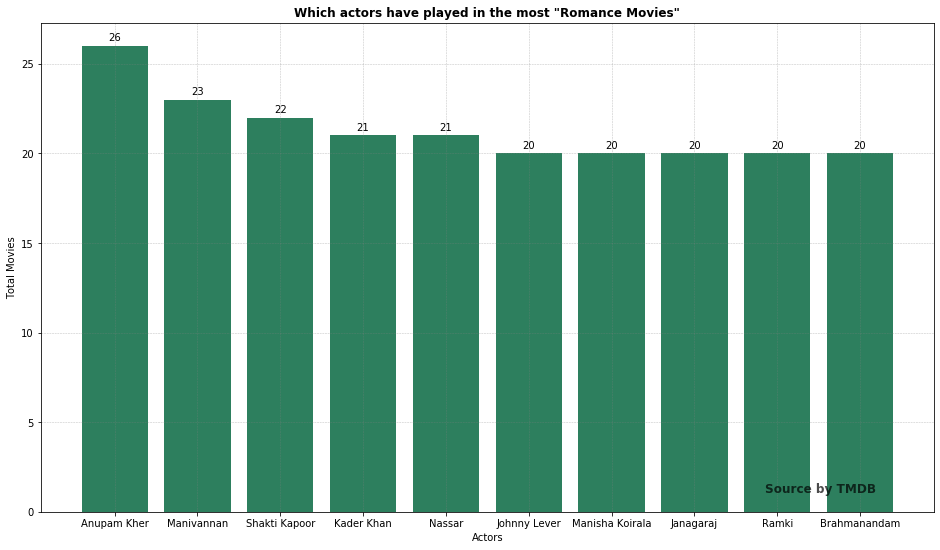

In [26]:
#Sizing the bar plot
fig, ax = plt.subplots(figsize =(16,9))

# Creating Barplot
rect1 = ax.bar(actorcount, numbercount, color = '#2d7f5e')

#Add gridlines
ax.grid(b = True, color='grey', linestyle= '--', linewidth= 0.5, alpha = 0.5)

#Plot Title
ax.set_title('Which actors have played in the most "Romance Movies"', fontweight='bold')

#Add numbers to bars
autolabel(rect1)

#Add own watermark
fig.text(0.85, 0.15, 'Source by TMDB', fontsize=12, color='black',fontweight='bold', ha='right', va='bottom', alpha=0.7)


#Creating bar plot
plt.xlabel('Actors')
plt.ylabel('Total Movies')
plt.savefig('6. Actors.png')
plt.show()

##### 7.How many Oscars, Wins & Nominations did the best Romance movies get (Top10)?
With all the Oscars of the Top 100 movies I decided to display the Top 10 movies and their Oscars, Nominations and Wins.

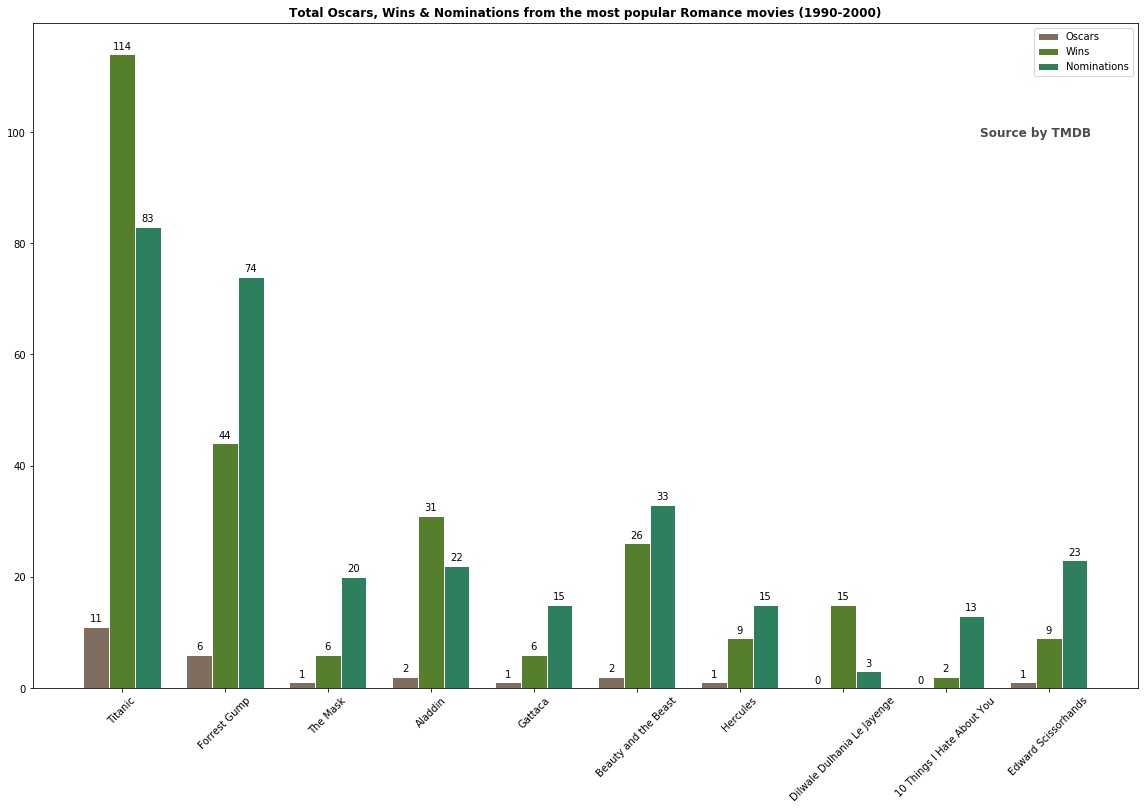

In [27]:
# Bar width
barWidth = 0.25
r1 = np.arange(len(df_Oscars['Oscars'].values[:10]))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

#Size of chart
fig, ax = plt.subplots(figsize =(16,10))
ax = plt.subplot()
ax.set_title('Total Oscars, Wins & Nominations from the most popular Romance movies (1990-2000)', fontweight='bold')

# Insert data from the Dataframe into the bar charts.
rect1 = ax.bar(r1, df_Oscars['Oscars'].values[:10].astype(int), color = '#7f6d5f', width=barWidth,edgecolor='white', label='Oscars')
rect2 = ax.bar(r2, df_Oscars['Wins'].values[:10].astype(int), color = '#557f2d', width=barWidth,edgecolor='white', label='Wins')
rect3 = ax.bar(r3, df_Oscars['Nominations'].values[:10].astype(int), color = '#2d7f5e', width=barWidth,edgecolor='white',  label='Nominations')

# Labeling each bar
autolabel(rect1)
autolabel(rect2)
autolabel(rect3)

# Watermark
fig.text(0.95, 0.80, 'Source by TMDB', fontsize=12, color='black',fontweight='bold', ha='right', va='bottom', alpha=0.7)

fig.tight_layout()
plt.xticks([r + barWidth for r in range(len(df_Oscars['Title'].values[:10]))], df_Oscars['Title'].values)
plt.xticks(rotation=45)
plt.legend()
plt.savefig('7. Oscars.png')
plt.show()

##### 8. What are the most "Parental Guidance" PG movies in Romance?
For the Top 100 movies I collected all the Parental Guidance. I also added extra information about the meanings of each PG. 

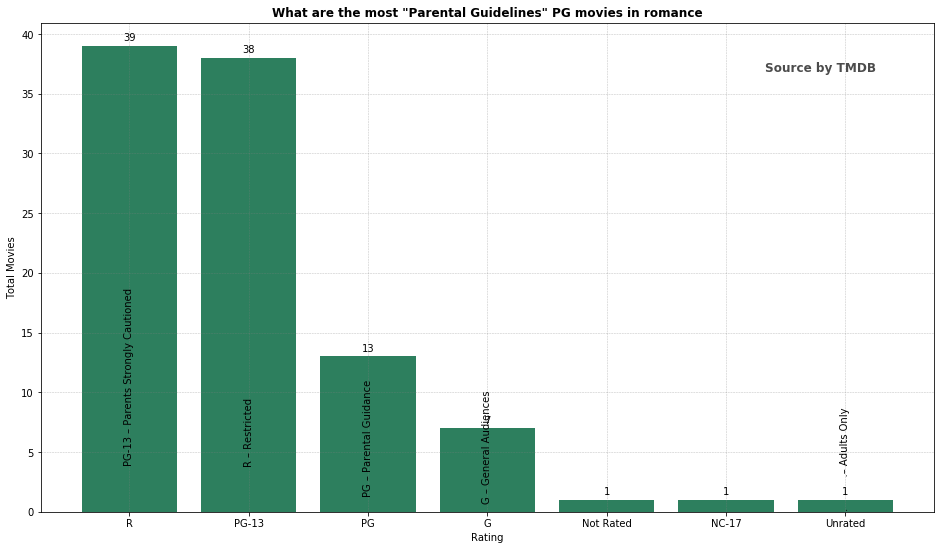

In [28]:
#Sizing the bar plot
fig, ax = plt.subplots(figsize =(16,9))

# Creating Barplot
rect1 = ax.bar(ratenames, ratecount, color = '#2d7f5e')

#Add gridlines
ax.grid(b = True, color='grey', linestyle= '--', linewidth= 0.5, alpha = 0.5)

#Plot Title
ax.set_title('What are the most "Parental Guidelines" PG movies in romance', fontweight='bold')

#Add numbers to bars
autolabel(rect1)

# Extra info about the meaning of each Partental Guideline
bar_label = ['PG-13 – Parents Strongly Cautioned','R – Restricted','PG – Parental Guidance','G – General Audiences','','','.          .– Adults Only']
def autolabel1(rects):
    for idx,rect in enumerate(rect1):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.1*height,
                bar_label[idx],
                ha='center', va='bottom', rotation=90)

autolabel1(rect1)

#Add own watermark
fig.text(0.85, 0.80, 'Source by TMDB', fontsize=12, color='black',fontweight='bold', ha='right', va='bottom', alpha=0.7)

plt.xlabel('Rating')
plt.ylabel('Total Movies')
plt.savefig('8. Rating.png')
plt.show()


##### 9. Which movies did each director in the Top 10 of Romance movie do?
For question 9 I decided to create a WordCloud to display the top 3 movies from the Top 10 directors in Romance. I have decided to use a WordCloud because its gives a good reprentation of movies that made Directors famous. Sometimes multiple Directors have worked on the same famous movies which makes the word in the Cloud bigger.

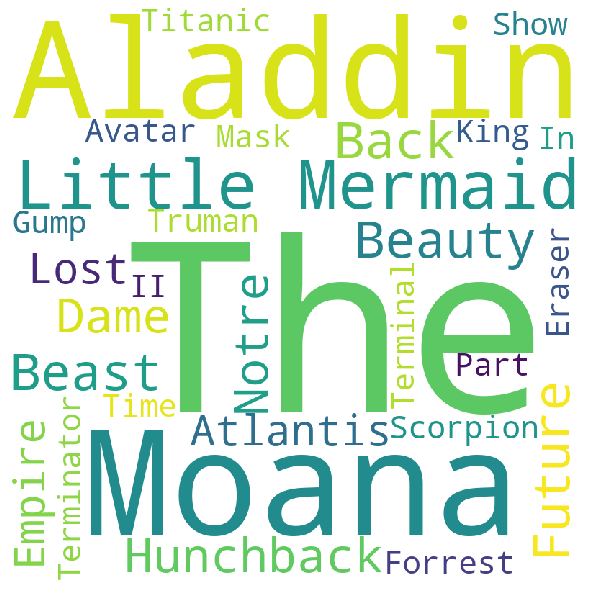

<Figure size 432x288 with 0 Axes>

In [29]:
stopwords = set(STOPWORDS) 
sent_str = ""
for i in Movie1:
    sent_str += str(i) + " "
for i in Movie2:
    sent_str += str(i) + " "
for i in Movie3:
    sent_str += str(i) + " "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(sent_str)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('9. wordCloud.png', dpi=100)

CLIENT_ID = "9ef0f6bbc1b0d7c"
DIR = os.getcwd()
PATH = DIR + '\\9. wordCloud.png'

im = pyimgur.Imgur(CLIENT_ID)
uploaded_image = im.upload_image(PATH, title="wordcloud")
wordcloud_imgur = uploaded_image.link

##### 10.Which Country did the most Romance Movies during 1990-2000?
Unfortunately I have tried to create a choropleth map python using <b> GeoPandas </b> but the package has some much dependencies and I kept getting errors when downloading Geopandas. I have tried for mutliple hours without succeed. So I presented my data in a bar chart.

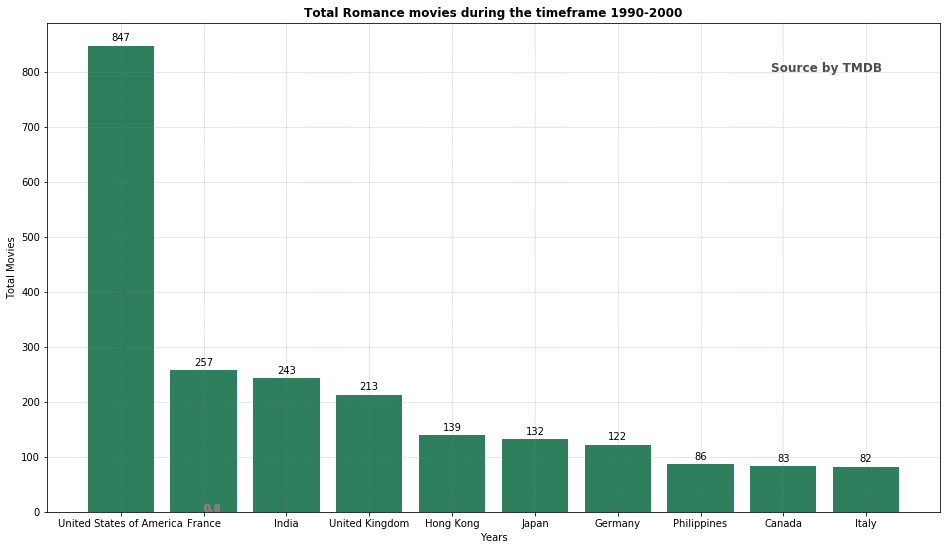

In [30]:
#Sizing the bar plot
fig, ax = plt.subplots(figsize =(16,9))

# Creating Barplot
rect1 = ax.bar(df_countries['Country'], df_countries['Count'].values.astype(int), color = '#2d7f5e')

#Add gridlines
ax.grid(b = True, color='grey', linestyle= '--', linewidth= 0.5, alpha = 0.5)

#Plot Title
ax.set_title('Total Romance movies during the timeframe 1990-2000', fontweight='bold')

#Add numbers to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2,i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight = 'bold', color = 'grey')

#Add own watermark
fig.text(0.85, 0.80, 'Source by TMDB', fontsize=12, color='black',fontweight='bold', ha='right', va='bottom', alpha=0.7)

#Labels
autolabel(rect1)

#Creating bar plot
#plt.barh(title[:10], popularity[:10], color = 'lightgreen')
plt.xlabel('Years')
plt.ylabel('Total Movies')
plt.savefig('10. Country.png')
plt.show()

# Data Presentation

Using the <b>Bokeh</b> Library I created a Dashboard with all the graphs used in the previous exercices. Most of the charts I had to remake because Bokeh uses other code to output the data. 

In [35]:
# 1. Which are the most popular movies in your genre?
bar_lengths= popularity[:10]

# Had to create arrays for labeling the charts.
y = np.array([1, 2, 3, 4, 5, 6, 7, 8 , 9, 10])
x = np.array(popularity[:10])

# Will label out the values onto the charts.
source = ColumnDataSource(data=dict(y=y,
                                    x=x,
                                    names=x))

#Create a new figure, where general information. 
r1 = figure(y_range=df_popular['Title'][:10] ,title="1. Which are the most popular movies in your genre?", x_axis_label='Popularity',y_axis_label='Name')

#Removes Vertical Line (X-Axis)
r1.xgrid.grid_line_color = None

#Label orientation
r1.xaxis.major_label_orientation = math.pi/2

#Shows chart at 0
r1.x_range.start = 0

#Creates a Horizontal Chart
r1.hbar(y, left=0, right=x, height=0.9, color="#7f6d5f")

#Labels each section point in the chart.
labels = LabelSet(x='x', y='y', text='names', level='glyph',
              x_offset=2, y_offset=-10, source=source, render_mode='canvas', text_font_size="8pt")
r1.add_layout(labels)


#2. Which are the best movies in your genre?
bar_lengths= bestMovieScore[:10]

# Had to create arrays for labeling the charts.
y = np.array([1, 2, 3, 4, 5, 6, 7, 8 , 9, 10])
x = np.array(bestMovieScore[:10])

# Will label out the values onto the charts.
source = ColumnDataSource(data=dict(y=y,
                                    x=x,
                                    names=x))

#Create a new figure, where general information. 
r2 = figure(y_range=bestMovieName[:10] ,title="2. Which are the best movies in your genre?", plot_height=500, x_axis_label='Vote Counts',y_axis_label='Name')

#Removes Vertical Line (X-Axis)
r2.xgrid.grid_line_color = None

#Label Orientation
r2.xaxis.major_label_orientation = math.pi/2

#Shows chart at 0
r2.x_range.start = 0

#Create a Horizontal barchart
r2.hbar(y, left=0, right=bar_lengths, height=0.9, color="#557f2d")

#Labels each section point in the chart.
labels = LabelSet(x='x', y='y', text='names', level='glyph',
              x_offset=2, y_offset=-10, source=source, render_mode='canvas',  text_font_size="8pt")
r2.add_layout(labels)

#3. Are these the same?
output_notebook()

#Takes the venn diagram from Matplotlib and adds it in Bokeh
r3 = Div(text="""<h4 style="color:#444444">3.Are these the Same?</h4><img src=" """ + venn_imgur + """ " alt="div_image" width="400">""", width=400, height=400)


#4. During your timeframe, when was your genre the most & least popular?

# Had to create arrays for labeling the charts.
y = np.array(total_movies[:11])
x = np.array(yearTimeframe[:11])

# Will label out the values onto the charts.
source = ColumnDataSource(data=dict(y=y,
                                    x=x,
                                    names=y))

#Create a new figure, where general information. 
r4 = figure(title="4. During your timeframe, when was your genre the most & least popular?")
r4.grid.grid_line_alpha = 0

#Labels
r4.xaxis.axis_label = 'Year'
r4.yaxis.axis_label = 'Total Movies'


#Grid Layout
r4.ygrid.band_fill_color = "#557f2d"
r4.ygrid.band_fill_alpha = 0.2


# Creates the dots on the chart + Labels
r4.circle(x = 'x', y= 'y', size=4, legend_label='# of movies',
          color='#7f6d5f', alpha=0.8, source = source)

# Creates the trendline
r4.line(x, y, legend_label='Evolution # of movies', color='#2d7f5e')
r4.legend.location = "top_left"

# Assigns the labels
labels = LabelSet(x='x', y='y', text='names', level='glyph',
              x_offset=5, y_offset=5, source=source, render_mode='canvas', text_font_size="8pt")
r4.add_layout(labels)


# 5. Are the movies who invested the highest budget, also the movies who turned over the highest proﬁt?
titles = df['Title'][:10]
years = ['Budget', 'Revenue', 'Profit']

# Data needed for the triple Bar chart
data = {'Titles' : titles,
        'Budget'   : df['Budget'].values[:10].astype(int),
        'Revenue'   : df['Revenue'].values[:10].astype(int),
        'Profit'   : df['Profit'].values[:10].astype(int)}

# Data needed for the labels
source = ColumnDataSource(data=data)

#General info for the bar chart.
r5 = figure(x_range=titles, y_range=(0, 2000000000), plot_height=250, title="5. Are the movies who invested the highest budget, also the movies who turned over the highest proﬁt?",
           toolbar_location=None, tools="")

#Bar chart 1 - Budget
r5.vbar(x=dodge('Titles', -0.25, range=r5.x_range), top='Budget', width=0.2, source=source,
       color="#2d7f5e", legend_label="Budget")

#Bar chart 2 - Revenue
r5.vbar(x=dodge('Titles',  0.0,  range=r5.x_range), top='Revenue', width=0.2, source=source,
       color="#7f6d5f", legend_label="Revenue")

#Bar chart 3 - Profit
r5.vbar(x=dodge('Titles',  0.25, range=r5.x_range), top='Profit', width=0.2, source=source,
       color="#557f2d", legend_label="Profit")

# X-Axis Padding
r5.x_range.range_padding = 0.1
r5.xgrid.grid_line_color = None

#Legenda
r5.legend.location = "top_left"
r5.legend.orientation = "horizontal"
r5.xaxis.major_label_orientation = math.pi/2

# 6. Which actor plays in the most "Romance" Movies?

#General info for the bar chart.
r6 = figure(x_range=actorcount[:10], plot_height=500, title="6. Which actor plays in the most 'Romance' Movies?")

#Create a Horizontal barchart
r6.vbar(x=actorcount, top=numbercount, width=0.9, color="#557f2d")

# No x-axis grid
r6.xgrid.grid_line_color = None

#Start at 0
r6.y_range.start = 0
r6.xaxis.major_label_orientation = math.pi/2


# 7.How many Oscars, Wins & Nominations did the best Romance movies get (Top10)?
titles = df_Oscars['Title'][:10]
years = ['Oscars', 'Wins', 'Nominations']

#Data collection
data = {'Titles' : titles,
        'Oscars'   : df_Oscars['Oscars'].values[:10].astype(int),
        'Wins'   : df_Oscars['Wins'].values[:10].astype(int),
        'Nominations'   : df_Oscars['Nominations'].values[:10].astype(int)}

source = ColumnDataSource(data=data)

#General info for the bar chart.
r7 = figure(x_range=titles, y_range=(0, 150), plot_height=250, title="7.How many Oscars, Wins & Nominations did the best Romance movies get (Top10)?",
           toolbar_location=None, tools="")

#Bar chart 1 - Oscars
r7.vbar(x=dodge('Titles', -0.25, range=r7.x_range), top='Oscars', width=0.2, source=source,
       color="#2d7f5e", legend_label="Oscars")

#Bar chart 2 - Wins
r7.vbar(x=dodge('Titles',  0.0,  range=r7.x_range), top='Wins', width=0.2, source=source,
       color="#7f6d5f", legend_label="Wins")

#Bar chart 3 - Nominations
r7.vbar(x=dodge('Titles',  0.25, range=r7.x_range), top='Nominations', width=0.2, source=source,
       color="#557f2d", legend_label="Nominations")

#Padding X-axis
r7.x_range.range_padding = 0.1
r7.xgrid.grid_line_color = None

#Legenda
r7.legend.location = "top_left"
r7.legend.orientation = "horizontal"
r7.xaxis.major_label_orientation = math.pi/2

# 8. What are the most "Parental Guidance" PG movies in Romance?

#General info for the bar chart.
r8 = figure(x_range=ratenames[:10], plot_height=500, title="8. What are the most 'Parental Guidance' PG movies in Romance?")

#Vertical Bar Chart
r8.vbar(x=ratenames, top=ratecount, width=0.9, color="#557f2d")
r8.xgrid.grid_line_color = None
r8.y_range.start = 0
r8.xaxis.major_label_orientation = math.pi/2

#9. Which movies did each director in the Top 10 of Romance movie do?
from bokeh.io import output_notebook, show
from bokeh.models.widgets import Div

output_notebook()

#Takes the WordCloud diagram from Matplotlib and adds it in Bokeh
r9 = Div(text="""<h4 style="color:#444444">9. Which movies did each director in the Top 10 of Romance movie do?</h4><img src=" """ + wordcloud_imgur + """ "alt="div_image" width="400">""", width=400, height=400)

#10.Which Country did the most Romance Movies during 1990-2000?
r10 = figure(x_range=df_countries['Country'], plot_height=500, title="10. Which Country did the most Romance Movies during 1990-2000?")
r10.vbar(x=df_countries['Country'], top=count_total, width=0.9, color="#557f2d")
r10.xgrid.grid_line_color = None
r10.y_range.start = 0
r10.xaxis.major_label_orientation = math.pi/2

grid = gridplot([r1, r2, r3, r4, r5, r6, r7, r8, r9, r10], ncols=3, plot_width=500, plot_height=500)
output_file("Dashboard.html")

show(grid)


Loading BokehJS ...

Loading BokehJS ...

# PDF

Using the PyPDF2 Library I extracted all the Image exensions and put them into a list. Looping through the list and then inserting them into a PDF File.

In [32]:
# Image extensions
image_extensions = ("*.png", "*.jpg", "*.gif")
 
# Lists that will hold the images 
images = []
 
# Looking at the extensions in directory
for extension in image_extensions:
    images.extend(glob.glob(extension))
 

pdf=FPDF('P','in','letter')
# Create a PDF Page
pdf.add_page()
# Set font to Arial Bold and text size 16
pdf.set_font('Arial','B',16.0)
 
# Page header
pdf.cell(4.0,1.0,'All Plots')
pdf.ln(0.25)
 
# Image captions
pdf.set_font('Arial','',10.0)
 
# Loop through the image list
for image in images:
 
    # Image sizing
    pdf.image(image, w=pdf.w/2.0, h=pdf.h/4.0)
    pdf.ln(0.15)
 
    # Image caption
    pdf.cell(3.0, 0.0, image)
    pdf.ln(0.25)
 
pdf.output('Plots.pdf','F')

''